In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.multiclass import OneVsRestClassifier
import re, string
from sklearn.model_selection import train_test_split # Not for Kaggle
import jieba.posseg as pseg
from nltk.corpus.reader import wordlist


In [2]:
# 随机抽取 抽过一次做测试的时候就不用再抽了
# data = pd.read_csv('./resFin.csv')

# train, test = train_test_split(data) # shuffle=False resulted in "Invalid parameters passed". Why?
# train.to_csv("./train_samples.csv",index=False,encoding='utf_8_sig')
# test.to_csv("./test_samples.csv",index=False,encoding='utf_8_sig')

In [ ]:
# 读取数据
train = pd.read_csv('./train_samples.csv')
test = pd.read_csv('./test_samples.csv')



In [3]:
train.head()

,id,name,text,中文名,外文名,别名,拼音,国籍,本名,作者,类型,书名,作品名称
4777,6625,工业文明,工业文明，是指工业社会文明亦即未来学家托夫勒所言的第二次浪潮文明，它贯穿着劳动方式最优化、劳...,1,0,0,0,0,0,0,0,0,0
5838,8106,敫桂英,敫桂英是京剧折子戏《打神告庙》中的人物，敫桂英曾救助落难书生王魁，两人在海神庙山盟海誓，王魁...,0,0,0,0,0,1,0,0,0,0
3712,5118,上海中晨数字技术设备有限公司,上海中晨数字技术设备有限公司于2000年10月24日在普陀区市场监督管理局登记成立。法定代表...,0,0,0,0,0,0,0,0,0,0
4322,6008,洛威·舍曼,洛威·舍曼，影视演员、导演，主要作品有《希腊人对此有说法》等。 洛威·舍曼主要作品 编辑 语...,1,0,0,0,0,0,0,0,0,0
1009,1453,肪,【汉字】肪，【拼音】fáng [1] 肪详细释义 编辑 语音 〈名〉形声。字从肉从方，方亦声...,1,0,0,1,0,0,0,0,0,0


In [4]:
# train['text'][0]

In [5]:
# train['text'][2]

In [6]:
lens = train.text.str.len()
lens.mean(), lens.std(), lens.max()

(2215.5136846867226, 2602.506523627819, 25106)

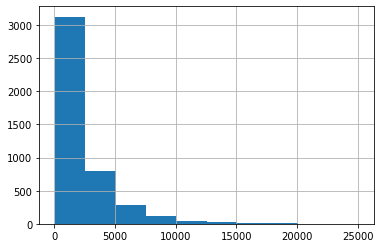

In [7]:
lens.hist();

In [8]:
# 洗发水	BB霜	T区	按摩膏	彩妆套装	唇部护理	唇彩	唇膏	唇线笔	定妆喷雾	发膜	防晒	粉底液	隔离	护发素	护肤套装	护手霜	睫毛膏	精油	眉笔眉粉	美甲	气垫	染发	散粉	身体乳	爽肤水	脱毛	洗护套装	香水	修容高光	胭脂腮红	眼影	眼线	造型	遮瑕	妆前乳	眼霜	面部精华	乳液面霜	面膜	洁面	面部磨砂	卸妆	粉饼干湿两用粉饼	粉底霜膏	香水套装	粉底棒条

label_cols = ['中文名',	'外文名',	'别名',	'拼音',	'国籍',	'本名',	'作者',	'类型',	'书名',	'作品名称']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

C:\Users\15728\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,中文名,外文名,别名,拼音,国籍,本名,作者,类型,书名,作品名称,none
count,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000
mean,4078.889392,0.905225,0.517078,0.053834,0.045012,0.034155,0.028274,0.023298,0.018322,0.016060,0.009952,0.018774
std,2337.151546,0.292937,0.499765,0.225715,0.207355,0.181648,0.165774,0.150865,0.134127,0.125719,0.099276,0.135741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2063.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4092.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6096.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
len(train),len(test)

(4421, 1474)

In [10]:
COMMENT = 'text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

C:\Users\15728\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    text = text.replace(" ", "")
    return text

In [12]:
test['text'] = test['text'].map(lambda com : clean_text(com))

C:\Users\15728\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
# =IF(ISERROR(MID(B2,FIND("】",B2)+1,99)),B2,MID(B2,FIND("】",B2)+1,99))
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [14]:
trainWordList = []
testWordList = []
for item in train[COMMENT]:
    # print(item)
    words1 = [word.word for word in pseg.cut(item)]
    trainWordList.append(','.join(words1))
    # print(trainWordList)
for item in test[COMMENT]:
    # print(item)
    words1 = [word.word for word in pseg.cut(item)]
    # print()
    testWordList.append(','.join(words1))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\15728\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built successfully.


In [15]:
# tdidf版本 2vec
# n = train.shape[0]
# # TfidfVectorizer 完成向量化与 TF-IDF 预处理

# vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
#                min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,encoding='utf-8',
#                smooth_idf=1, sublinear_tf=1 )

# print(trainWordList)
# testWordList
# trn_term_doc = vec.fit_transform(trainWordList)
# test_term_doc = vec.transform(testWordList)

In [16]:
# tdidf版本 2vec 简略版
# instantiate the class
vectorizer = TfidfVectorizer()
#define the corpus
# corpus = trainWordList
#transform the fitted corpus
trn_term_doc= vectorizer.fit_transform(trainWordList)
test_term_doc= vectorizer.transform(testWordList)
#print the transformed data in matrix form
# print(trn_term_doc.toarray())

In [17]:
# # 生成语料词典
# dictionary = corpora.Dictionary(words_ls)
# # print(dictionary)

# # Initialise model, for more information, please check the Gensim Word2vec documentation
# model = Word2Vec(words_ls,  window=2, min_count=0)
# # Get a list of words in the vocabulary
# # words = model.wv.vocab.keys()
# # Make a dictionary

# words = list(model.wv.index_to_key)
# we_dict = [ model.wv[word] for word in words]
# print(we_dict)
# # 生成稀疏向量集
# corpus = [dictionary.doc2bow(words) for words in words_ls]
# corpus

In [18]:
trn_term_doc, test_term_doc

(<4421x235198 sparse matrix of type '<class 'numpy.float64'>'
 	with 1456386 stored elements in Compressed Sparse Row format>,
 <1474x235198 sparse matrix of type '<class 'numpy.float64'>'
 	with 451245 stored elements in Compressed Sparse Row format>)

In [19]:
# def pr(y_i, y):
#     p = x[y==y_i].sum(0)
#     return (p+1) / ((y==y_i).sum()+1)

In [20]:
x = trn_term_doc
test_x = test_term_doc

In [21]:
# def get_mdl(y):
    # y = y.values
    # r = np.log(pr(1,y) / pr(0,y))
    # m = LogisticRegression(C=4, dual=False)
    # m = MultinomialNB()
    # x_nb = x.multiply(r)
    # return m.fit(x_nb, y), r
def get_mdl(x,y):
    m = MultinomialNB()
    return m.fit(x, y)

In [24]:
preds = np.zeros((len(test), len(label_cols)))
# print(label_cols)
for i, j in enumerate(label_cols):
    print('fit', j)
    m = get_mdl(trn_term_doc,train[j])
    preds[:,i] = m.predict_proba(test_x)[:,1]

fit 中文名
fit 外文名
fit 别名
fit 拼音
fit 国籍
fit 本名
fit 作者
fit 类型
fit 书名
fit 作品名称


In [ ]:
# len(test) as length, len(label_cols) as width init with zero
# simvsm_similiar = np.zeros((len(test), len(label_cols)))
# simvsm = SimVsm()
# print(simvsm_similiar.shape)
# for i, j in enumerate(label_cols):
#     simvsm_similiar[:,i] = simvsm.arr_distance(test[COMMENT], j)

In [26]:
submission = pd.DataFrame(preds, columns = label_cols)
submission.to_csv('submission_test.csv', index=False)